##Assignment - 1 - PS 15

Dataset - Boston Airbnb reviews

Group Details - Number - 46


*   Divyanshu Singh        - 2022AC05011
*   Arvind Gupta           - 2022AC05120
*   SATYA PRAKASH PANDIT   - 2022AC05040
*   Pushkar Kumar Verma    - 2022AC05272

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

reviewsDF = pd.read_csv("/content/boston airbnb reviews.csv")
reviewsDF = reviewsDF.dropna()
reviewsDF.head()

,listing_id,id,reviewer_id,reviewer_name,comments
0,1178162,4724140,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


Dropped any rows with missing values (NaN) from the DataFrame and displayed the first few rows using head().

Analysing the dataset by doing polarity check on sentiments for further processing

In [ ]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

reviewsDF['polarity_value'] = "Default"
reviewsDF['neg'] = 0.0
reviewsDF['pos'] = 0.0
reviewsDF['neu'] = 0.0
reviewsDF['compound'] = 0.0

for index, row in reviewsDF.iterrows():
    ss = sid.polarity_scores(row['comments'])
    reviewsDF.at[index, 'polarity_value'] = ss
    reviewsDF.at[index, 'neg'] = ss['neg']
    reviewsDF.at[index, 'pos'] = ss['pos']
    reviewsDF.at[index, 'neu'] = ss['neu']
    reviewsDF.at[index, 'compound'] = ss['compound']

reviewsDF.head()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,listing_id,id,reviewer_id,reviewer_name,comments,polarity_value,neg,pos,neu,compound
0,1178162,4724140,4298113,Olivier,My stay at islam's place was really cool! Good...,"{'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'comp...",0.0,0.352,0.648,0.9626
1,1178162,4869189,6452964,Charlotte,Great location for both airport and city - gre...,"{'neg': 0.0, 'neu': 0.639, 'pos': 0.361, 'comp...",0.0,0.361,0.639,0.9061
2,1178162,5003196,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...,"{'neg': 0.0, 'neu': 0.767, 'pos': 0.233, 'comp...",0.0,0.233,0.767,0.9663
3,1178162,5150351,2215611,Marine,The room was nice and clean and so were the co...,"{'neg': 0.0, 'neu': 0.673, 'pos': 0.327, 'comp...",0.0,0.327,0.673,0.9267
4,1178162,5171140,6848427,Andrew,Great location. Just 5 mins walk from the Airp...,"{'neg': 0.0, 'neu': 0.637, 'pos': 0.363, 'comp...",0.0,0.363,0.637,0.8658


In [ ]:
reviewsDF.to_csv('pority_Values_reviews.csv')

Filtering the DataFrame to include only the comments in English.

In [ ]:
# Our dataframe consists of reviews in different language as well.Hence removing the comments which are not in english
!pip install langdetect
from langdetect import detect

def detect_lang(comment):
    try:
        return detect(str(comment))
    except:
        return "None"

# Applying language detection to the 'comments' column and creating a new 'language' column
reviewsDF['language'] = reviewsDF['comments'].apply(detect_lang)

# Filtering the DataFrame to include only English comments
EngReviewsDF = reviewsDF[reviewsDF['language'] == 'en']



In [ ]:
EngReviewsDF.head(5)

,listing_id,id,reviewer_id,reviewer_name,comments,polarity_value,neg,pos,neu,compound,language
0,1178162,4724140,4298113,Olivier,My stay at islam's place was really cool! Good...,"{'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'comp...",0.0,0.352,0.648,0.9626,en
1,1178162,4869189,6452964,Charlotte,Great location for both airport and city - gre...,"{'neg': 0.0, 'neu': 0.639, 'pos': 0.361, 'comp...",0.0,0.361,0.639,0.9061,en
2,1178162,5003196,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...,"{'neg': 0.0, 'neu': 0.767, 'pos': 0.233, 'comp...",0.0,0.233,0.767,0.9663,en
3,1178162,5150351,2215611,Marine,The room was nice and clean and so were the co...,"{'neg': 0.0, 'neu': 0.673, 'pos': 0.327, 'comp...",0.0,0.327,0.673,0.9267,en
4,1178162,5171140,6848427,Andrew,Great location. Just 5 mins walk from the Airp...,"{'neg': 0.0, 'neu': 0.637, 'pos': 0.363, 'comp...",0.0,0.363,0.637,0.8658,en


Just checking for Positive and negative effects

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you already have EngReviewsDF DataFrame with 'pos' column

# Extracting positive sentiment scores
polarDF = EngReviewsDF[['pos']]

# Grouping by sentiment score ranges
polarDF = polarDF.groupby(pd.cut(polarDF["pos"], np.arange(0, 1.1, 0.1))).count()

# Renaming columns
polarDF = polarDF.rename(columns={'pos': 'count_of_Comments'})
polarDF = polarDF.reset_index()

# Creating additional columns for visualization
polarDF['RANGE'] = polarDF['pos'].apply(lambda x: float(str(x)[1:4].replace(',', '')))
polarDF['Sentiment'] = 'positive'

# Removing unnecessary columns
del polarDF['pos']

polarDF.head()


,count_of_Comments,RANGE,Sentiment
0,2168,0.0,positive
1,11925,0.1,positive
2,20762,0.2,positive
3,15757,0.3,positive
4,7410,0.4,positive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you already have EngReviewsDF DataFrame with 'neg' column

# Extracting negative sentiment scores
polarDFneg = EngReviewsDF[['neg']]

# Grouping by sentiment score ranges
polarDFneg = polarDFneg.groupby(pd.cut(polarDFneg["neg"], np.arange(0, 1.1, 0.1))).count()

# Renaming columns
polarDFneg = polarDFneg.rename(columns={'neg': 'count_of_Comments'})
polarDFneg = polarDFneg.reset_index()

# Creating additional columns for visualization
polarDFneg['RANGE'] = polarDFneg['neg'].apply(lambda x: float(str(x)[1:4].replace(',', '')))
polarDFneg['Sentiment'] = 'negative'

# Removing unnecessary columns
del polarDFneg['neg']

# Combine polarDFneg with polarDF
polarDF = pd.concat([polarDF, polarDFneg], ignore_index=True)

polarDFneg.head()


,count_of_Comments,RANGE,Sentiment
0,18078,0.0,negative
1,1460,0.1,negative
2,143,0.2,negative
3,23,0.3,negative
4,13,0.4,negative


Tell about sentiments, there are more positive reviews than negative!!

Perform pre-processing steps like Removing Punctuations, Numbers, and Special Characters, Stop Words in dataset.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('stopwords')
nltk.download('punkt')

# Sample DataFrame
# Assume your comments are in a column named 'comments' in EngReviewsDF

# Function to perform text pre-processing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation and numbers
    translator = str.maketrans('', '', string.punctuation + string.digits)
    text = text.translate(translator)

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.lower() not in stop_words]

    # Join the words back into a string
    preprocessed_text = ' '.join(words)

    return preprocessed_text

# Explicitly create a copy of the DataFrame
EngReviewsDF_copy = EngReviewsDF.copy()

# Apply the pre-processing function to the 'comments' column using loc
EngReviewsDF_copy['preprocessed_comments'] = EngReviewsDF_copy['comments'].apply(preprocess_text)

# Display the DataFrame with preprocessed text
EngReviewsDF_copy[['comments', 'preprocessed_comments']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,comments,preprocessed_comments
0,My stay at islam's place was really cool! Good...,stay islams place really cool good location mi...
1,Great location for both airport and city - gre...,great location airport city great amenities ho...
2,We really enjoyed our stay at Islams house. Fr...,really enjoyed stay islams house outside house...
3,The room was nice and clean and so were the co...,room nice clean commodities close airport metr...
4,Great location. Just 5 mins walk from the Airp...,great location mins walk airport station good ...


Perform normalization by using Lemmatization.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Sample DataFrame
# Assume your preprocessed comments are in a column named 'preprocessed_comments' in EngReviewsDF

# Function to perform lemmatization
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()

    # Tokenize the text
    words = word_tokenize(text)

    # Lemmatize each word
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Join the lemmatized words back into a string
    lemmatized_text = ' '.join(lemmatized_words)

    return lemmatized_text

# Apply lemmatization to the 'preprocessed_comments' column
EngReviewsDF_copy['lemmatized_comments'] = EngReviewsDF_copy['preprocessed_comments'].apply(lemmatize_text)

# Display the DataFrame with lemmatized text
EngReviewsDF_copy[['preprocessed_comments', 'lemmatized_comments']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,preprocessed_comments,lemmatized_comments
0,stay islams place really cool good location mi...,stay islam place really cool good location min...
1,great location airport city great amenities ho...,great location airport city great amenity hous...
2,really enjoyed stay islams house outside house...,really enjoyed stay islam house outside house ...
3,room nice clean commodities close airport metr...,room nice clean commodity close airport metro ...
4,great location mins walk airport station good ...,great location min walk airport station good f...


Lets analyze what were the most talked about words in all the comments.

In [ ]:
from nltk.corpus import stopwords
import string
import nltk

words=''
for index,row in EngReviewsDF.iterrows():
    words += row['comments']

 Using the word_tokenize function from NLTK to split the combined string into individual words.

In [ ]:
from nltk.tokenize import word_tokenize

# Tokenize the combined string into individual words
word_tokens = word_tokenize(words)

# Display the first few tokens
print(word_tokens[:10])


['My', 'stay', 'at', 'islam', "'s", 'place', 'was', 'really', 'cool', '!']


 Defined lists for string punctuation (string_punctuation), characters to ignore (ignoreChar), and numbers (nums).

In [ ]:
reviews_data=nltk.word_tokenize(words)
string_punctuation = string.punctuation
ignoreChar=['\r','\n','',' ',"'s",'!',',',]
nums=['0','1','2','3','4','5','6','7','8','9']

Additionally, filtering out stopwords and converting the remaining words to lowercase.

In [ ]:
from nltk.corpus import stopwords

cachedStopWords = stopwords.words("english")
cachedStopWords.append('the')

words_only = [''.join(c for c in s if c not in string.punctuation if c not in nums if c not in ignoreChar) for s in reviews_data]
words_only = [s for s in words_only if s]
comments_filtered_data=' '.join(words_only)
comments_filtered_data = ' '.join([word.lower() for word in comments_filtered_data.split() if word not in cachedStopWords])

Using the WordCloud library to generate a word cloud visualization based on the filtered comments data (comments_filtered_data).

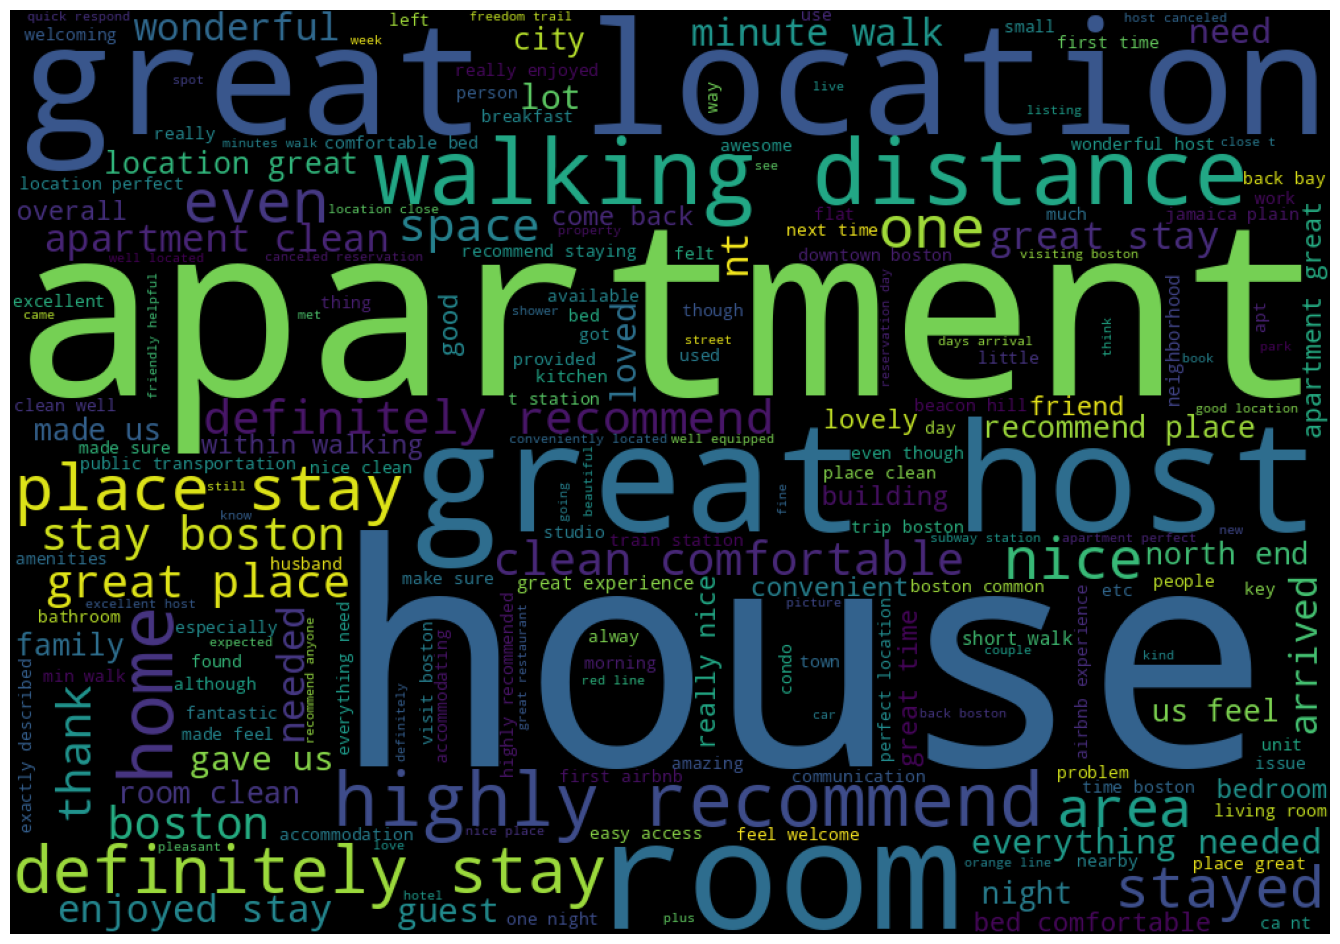

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1000, height = 700).generate(comments_filtered_data)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

It can be seen that the most talked about words are "great location", "great host", "walking distance", "house", "apartment" and "highly recommended".All these reviews and comments plays a big role in attracting the attention of travellers and if there are comments such as "highly recommended" then travellers surely takes a look at the listing.

Apply a POS tagging algorithm or utilize a pretrained POS tagger to assign POS tags to the words in the dataset.  

In [ ]:
import nltk
from nltk import pos_tag, word_tokenize
from nltk.corpus import stopwords

# Download necessary resources
nltk.download('averaged_perceptron_tagger')

# Define a function for POS tagging
def pos_tagging(text):
    # Tokenize the text
    words = word_tokenize(text)

    # Perform POS tagging
    pos_tags = pos_tag(words)

    return pos_tags

# Apply POS tagging to the 'preprocessed_comments' column
EngReviewsDF_copy['pos_tags'] = EngReviewsDF_copy['preprocessed_comments'].apply(pos_tagging)

# Display the DataFrame with POS tags
print(EngReviewsDF_copy[['preprocessed_comments', 'pos_tags']].head())


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


                               preprocessed_comments  \
0  stay islams place really cool good location mi...   
1  great location airport city great amenities ho...   
2  really enjoyed stay islams house outside house...   
3  room nice clean commodities close airport metr...   
4  great location mins walk airport station good ...   

                                            pos_tags  
0  [(stay, NN), (islams, JJ), (place, NN), (reall...  
1  [(great, JJ), (location, NN), (airport, NN), (...  
2  [(really, RB), (enjoyed, VBN), (stay, NN), (is...  
3  [(room, NN), (nice, JJ), (clean, JJ), (commodi...  
4  [(great, JJ), (location, NN), (mins, NNS), (wa...  


In [ ]:
# Display the DataFrame structure
print(EngReviewsDF.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 64511 entries, 0 to 68274
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   listing_id      64511 non-null  int64  
 1   id              64511 non-null  int64  
 2   reviewer_id     64511 non-null  int64  
 3   reviewer_name   64511 non-null  object 
 4   comments        64511 non-null  object 
 5   polarity_value  64511 non-null  object 
 6   neg             64511 non-null  float64
 7   pos             64511 non-null  float64
 8   neu             64511 non-null  float64
 9   compound        64511 non-null  float64
 10  language        64511 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 5.9+ MB
None


Calculate the frequency of each POS tag in the dataset.

In [ ]:
from collections import Counter

# Flatten the list of POS tags
all_pos_tags = [tag for tags in EngReviewsDF_copy['pos_tags'] for _, tag in tags]

# Count the frequency of each POS tag
pos_tag_freq = Counter(all_pos_tags)

# Display the frequency of each POS tag
print(pos_tag_freq)


Counter({'NN': 730638, 'JJ': 487109, 'RB': 188156, 'NNS': 162216, 'VBD': 100757, 'VBG': 80856, 'VBP': 80070, 'VB': 58226, 'VBN': 54029, 'IN': 42119, 'MD': 27398, 'PRP': 21658, 'VBZ': 18422, 'CD': 14504, 'JJR': 5586, 'JJS': 5519, 'RBR': 4237, 'DT': 3612, 'RP': 2557, 'FW': 2356, 'NNP': 2305, 'CC': 1940, 'RBS': 412, 'WRB': 396, 'WDT': 325, 'WP': 258, 'PRP$': 115, 'TO': 61, 'UH': 52, 'WP$': 39, 'POS': 11, 'PDT': 11, 'EX': 7, 'NNPS': 6, '$': 5, 'SYM': 4})


Identify and print the most common POS tags and their frequencies

In [ ]:
# Identify and print the most common POS tags and their frequencies
from collections import Counter

# Flatten the list of POS tags
all_pos_tags = [tag for tags in EngReviewsDF_copy['pos_tags'] for _, tag in tags]

# Count the frequency of each POS tag
pos_tag_freq = Counter(all_pos_tags)

# Print the most common POS tags and their frequencies (top 10 in this case)
top_pos_tags = pos_tag_freq.most_common(10)
for tag, freq in top_pos_tags:
    print(f"{tag}: {freq}")


NN: 730638
JJ: 487109
RB: 188156
NNS: 162216
VBD: 100757
VBG: 80856
VBP: 80070
VB: 58226
VBN: 54029
IN: 42119


It indicates that nouns (NN) and adjectives (JJ) are quite common, followed by adverbs (RB) and plural nouns (NNS).

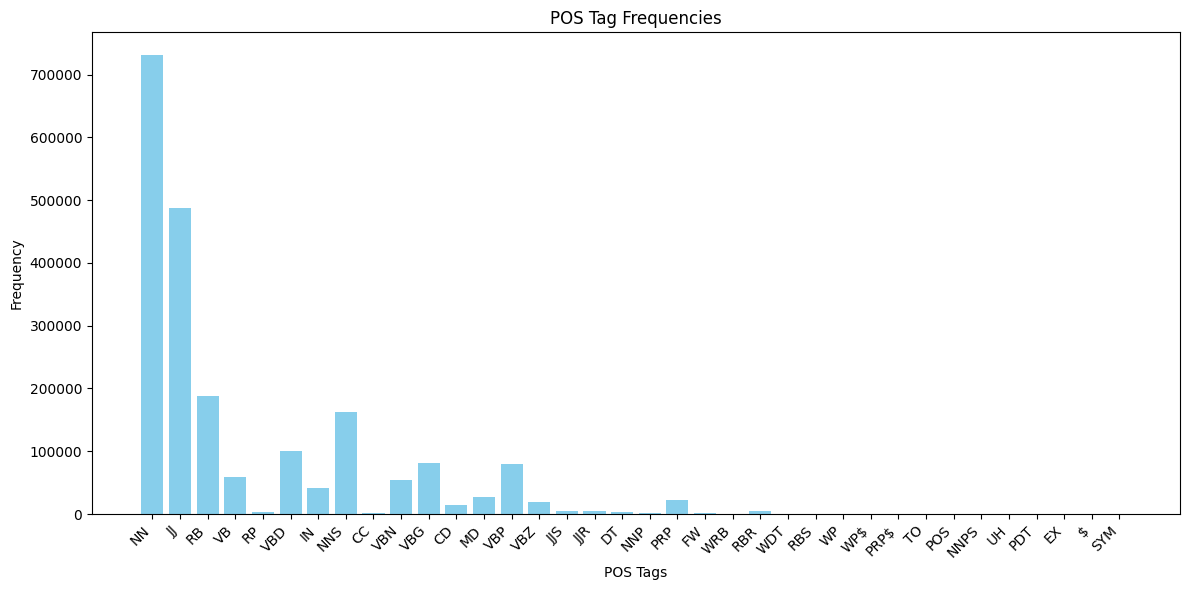

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Flatten the list of POS tags
all_pos_tags = [tag for tags in EngReviewsDF_copy['pos_tags'] for _, tag in tags]

# Count the frequency of each POS tag
pos_tag_freq = Counter(all_pos_tags)

# Extract POS tags and their frequencies
tags, frequencies = zip(*pos_tag_freq.items())

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(tags, frequencies, color='skyblue')
plt.xlabel('POS Tags')
plt.ylabel('Frequency')
plt.title('POS Tag Frequencies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Display the HMM POS tagging on the first 4 rows of the dataset.

In [ ]:
import nltk
from nltk.tag import hmm
from nltk.tokenize import word_tokenize

# Assuming 'preprocessed_comments' column contains the text data in EngReviewsDF_copy
comments_list = EngReviewsDF_copy['preprocessed_comments'].head(4).tolist()

# Train a simple HMM POS tagger (you can use a more extensive training set for better performance)
train_data = nltk.corpus.treebank.tagged_sents()[:3000]
tagger = hmm.HiddenMarkovModelTrainer().train(train_data)

# Perform HMM POS tagging on each comment
hmm_pos_tags = [tagger.tag(word_tokenize(comment)) for comment in comments_list]

# Print the HMM POS tags
for tags in hmm_pos_tags:
    print(tags)


[('stay', 'VB'), ('islams', 'NNP'), ('place', 'NNP'), ('really', 'NNP'), ('cool', 'NNP'), ('good', 'NNP'), ('location', 'NNP'), ('min', 'NNP'), ('away', 'NNP'), ('subway', 'NNP'), ('min', 'NNP'), ('downtown', 'NNP'), ('room', 'NNP'), ('nice', 'NNP'), ('place', 'NNP'), ('clean', 'NNP'), ('islam', 'NNP'), ('managed', 'NNP'), ('pretty', 'NNP'), ('well', 'NNP'), ('arrival', 'NNP'), ('even', 'NNP'), ('last', 'NNP'), ('minute', 'NNP'), ('recommand', 'NNP'), ('place', 'NNP'), ('airbnb', 'NNP'), ('user', 'NNP')]
[('great', 'JJ'), ('location', 'NN'), ('airport', 'NNP'), ('city', 'NNP'), ('great', 'NNP'), ('amenities', 'NNP'), ('house', 'NNP'), ('plus', 'NNP'), ('islam', 'NNP'), ('always', 'NNP'), ('helpful', 'NNP'), ('even', 'NNP'), ('though', 'NNP'), ('away', 'NNP')]
[('really', 'RB'), ('enjoyed', 'VBN'), ('stay', 'NNP'), ('islams', 'NNP'), ('house', 'NNP'), ('outside', 'NNP'), ('house', 'NNP'), ('didnt', 'NNP'), ('look', 'NNP'), ('inviting', 'NNP'), ('inside', 'NNP'), ('nice', 'NNP'), ('even'

Below are some common POS tag abbreviations:

NN: Noun (e.g., dog, city)
VB: Verb (e.g., run, eat)
JJ: Adjective (e.g., happy, tall)
RB: Adverb (e.g., quickly, very)
IN: Preposition or subordinating conjunction (e.g., in, on)
DT: Determiner (e.g., the, a)
PRP: Personal pronoun (e.g., I, you, he)
CC: Coordinating conjunction (e.g., and, but)
NNP: Proper noun (e.g., New York, John)
VBN: Verb, past participle (e.g., eaten, seen)
MD: Modal (e.g., can, will)
RP: Particle (e.g., up, off)